<a href="https://colab.research.google.com/github/Keoni808/CSC313_SuperMario/blob/main/Linear_Transformations_(Figures).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Understanding Linear Transformations: A Guide for Self-Learners, By a Self-Learner"


In [ ]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

# used to adjust grid
from matplotlib.ticker import MultipleLocator

# Figure 1 (Example of Function / Mapping)


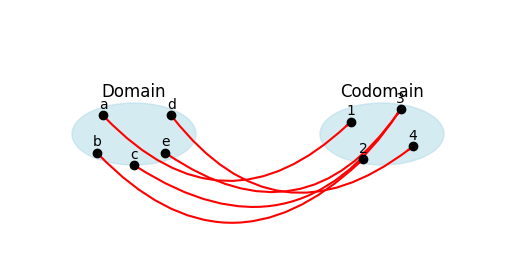

In [ ]:
def draw_set(ax, center, width, height, label, points, point_labels):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, color='lightblue', fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=12)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=10)

# Initialize plot
fig, ax = plt.subplots()

# Define properties for domain and codomain
domain_center = [1, 0]
codomain_center = [5, 0]
set_width, set_height = 2, 1

# Points in the domain and codomain
domain_points = np.array([[-0.5, 0.3], [-0.6, -0.3], [0, -0.5], [0.6, 0.3], [0.5, -0.3]])
codomain_points = np.array([[-0.5, 0.2], [-0.3, -0.4], [0.3, 0.4], [0.5, -0.2]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'])
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'])

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=.5", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
ax.set_xlim(-1, 7)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.show()


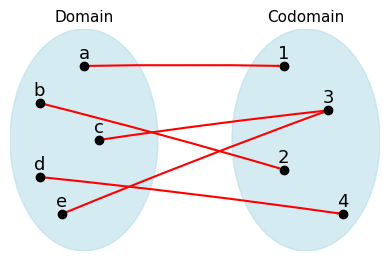

In [ ]:
def draw_set(ax, center, width, height, label, points, point_labels):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, color='lightblue', fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=11)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=13)

# Initialize plot
fig, ax = plt.subplots(figsize=(4, 3))

# Define properties for domain and codomain
domain_center = [1.5, 0]
codomain_center = [4.5, 0]
set_width, set_height = 2, 3

# Points in the domain and codomain
domain_points = np.array([[0, 1], [-0.6, 0.5], [0.2, 0], [-0.6, -0.5], [-0.3, -1]])
codomain_points = np.array([[-0.3, 1], [-0.3, -0.4], [0.3, 0.4], [0.5, -1]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'])
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'])

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=-.01", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
# ax.set_xlim(-1, 7)
# ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.tight_layout(h_pad=0.0, w_pad=0.0)
plt.margins(0)
plt.show()

fig.savefig('FunctionOrMapping.png')

# Figure 2 (visual example of a linear transformation)
1. Domain space with vectors in it
2. Codomain space with transformed vectors in it
  - The matrix that I want to use for the transformation, I would like to use a basic example that will give whole numbers. (e.i. the vectors from domain to codomain will both have whole numbers as coefficients)

In [ ]:
# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

# Define a transformation matrix
transformation_matrix = np.array([
    [-1, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [ ]:
print(transformed_vectors)

[[-2  3]
 [-1 -2]]


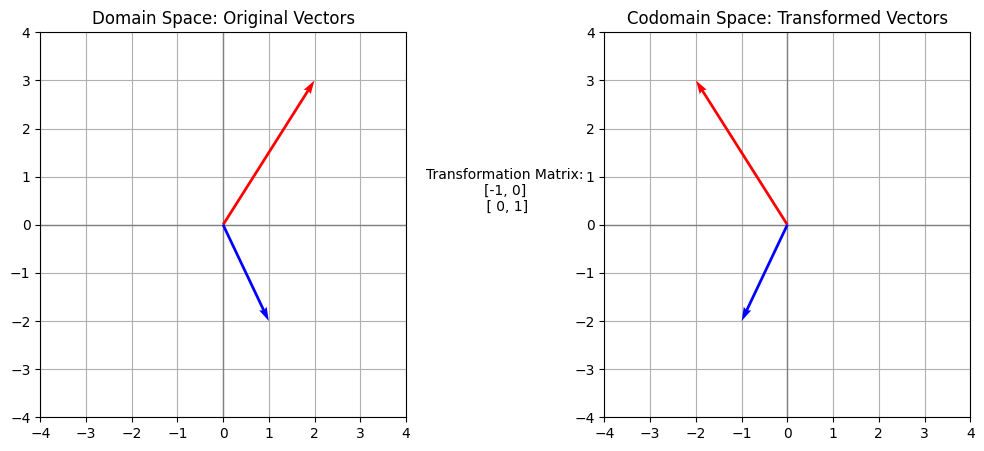

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=1.0)
ax1.axvline(0, color='grey', linewidth=1.0)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=1.0)
ax2.axvline(0, color='grey', linewidth=1.0)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[-1, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('BasicLinearTransformation.png')

# Figure 3 (Column Space Visual)

In [ ]:
# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

transformation_matrix = np.array([
    [0, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [ ]:
print(transformation_matrix)

[[0 0]
 [0 1]]


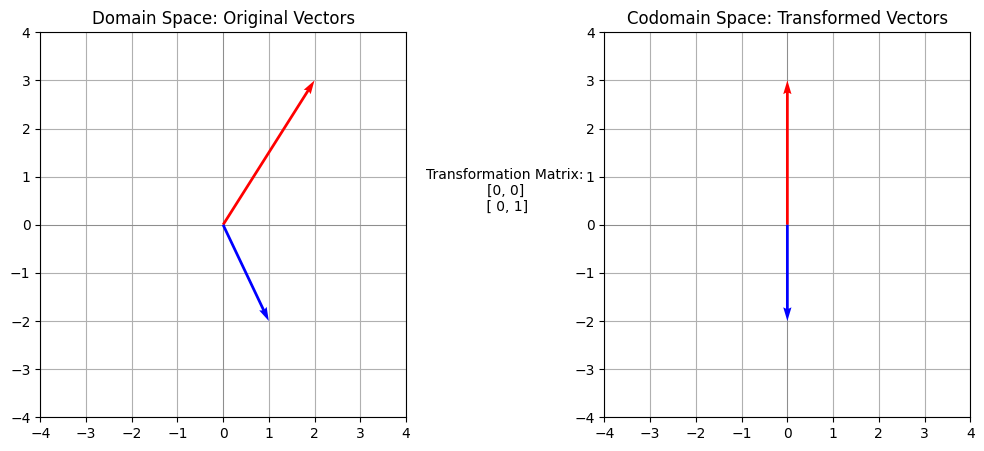

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder = 3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=0.5)
ax2.axvline(0, color='grey', linewidth=0.5)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[0, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('ColumnSpace.png')

# Figure 4 (2D to 3D Linear Transformation)

In [ ]:
vectors = np.array([2, 3])
origin = np.zeros((1, 2))

# Define the transformation matrix
A = np.array([[1, 0],
              [0, 1],
              [1, 0]])

transformed_vectors = A @ vectors

In [ ]:
transformed_vectors

array([2, 3, 2])

In [ ]:
basis = np.array([[2, 0, 0], [0, 3, 0], [0, 0, 2]])

In [ ]:
descriptive_transformed_vectors = np.concatenate(([transformed_vectors], basis), axis=0)
descriptive_transformed_vectors

array([[2, 3, 2],
       [2, 0, 0],
       [0, 3, 0],
       [0, 0, 2]])

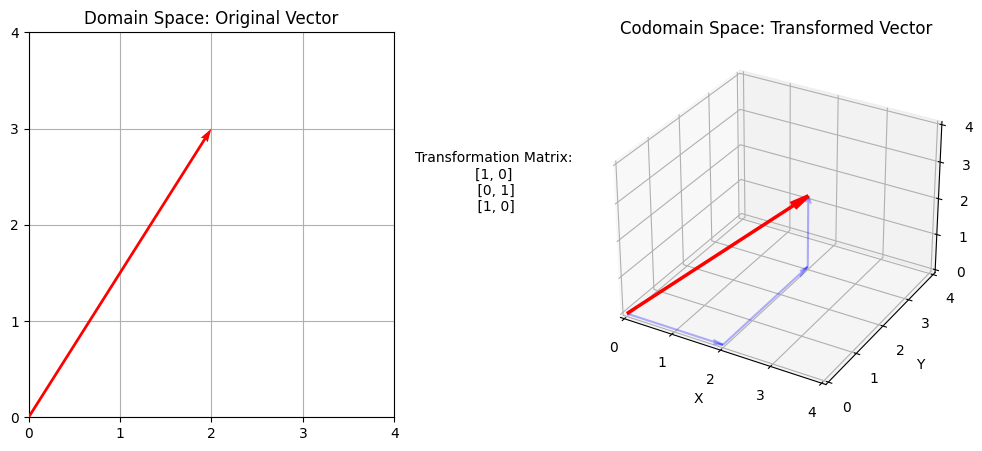

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

ax1.set_xlim(0, 4)
ax1.set_ylim(0, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vector')

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax2 = fig.add_subplot(1,15,(10, 15), projection='3d')
ax2.quiver(0,0,0, *descriptive_transformed_vectors[0], color=['r'], length=1, linewidth=2.5, arrow_length_ratio=0.09, zorder=3)
ax2.quiver(0,0,0, *descriptive_transformed_vectors[1], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,0,0, *descriptive_transformed_vectors[2], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,3,0, *descriptive_transformed_vectors[3], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([0, 4])
ax2.set_ylim([0, 4])
ax2.set_zlim([0, 4])
ax2.set_title('Codomain Space: Transformed Vector')

# Set the grid to show at each integer interval
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.zaxis.set_major_locator(MultipleLocator(1))

matrix_str = f'Transformation Matrix:\n[1, 0]\n [0, 1]\n [1, 0]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

fig.savefig('2d_to_3d_linear_transformation.png')

# Figure 5 (Standard Basis Vectors)

In [ ]:
vector = np.array([2, 3])
std_basis_vector_x = np.array([1, 0])
std_basis_vector_y = np.array([0, 1])

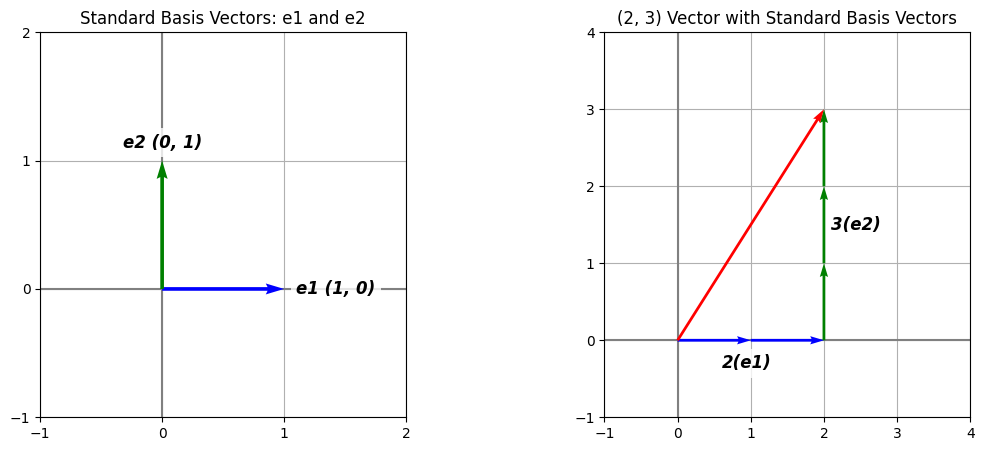

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Creating standard basis vectors (e1 & e2)
ax1 = fig.add_subplot(1, 15, (1, 6))
ax1.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)
ax1.quiver(0, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)

# Adding enhanced text annotations
ax1.text(1.1, 0, 'e1 (1, 0)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax1.text(0, 1.1, 'e2 (0, 1)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.axhline(0, color='grey', linewidth=1.5)
ax1.axvline(0, color='grey', linewidth=1.5)

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.grid(True)
ax1.set_title('Standard Basis Vectors: e1 and e2')

# Creating (2, 3) vector with standard basis vector breakdown
ax2 = fig.add_subplot(1, 15, (10, 15))
ax2.quiver(0, 0, *vector, color=['r'], scale=1, scale_units='xy', angles='xy', zorder=4)
ax2.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(1, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 1, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 2, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)

ax2.text(.6, -.3, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax2.text(2.1, 1.5, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)
ax2.axhline(0, color='grey', linewidth=1.5)
ax2.axvline(0, color='grey', linewidth=1.5)

ax2.grid(True)
ax2.set_title('(2, 3) Vector with Standard Basis Vectors')

fig.savefig('StandardBasisVectors.png')

Figure 6 (Standard Basis Vectors + Linear Transformation)

In [ ]:
std_basis_vector_x = np.array([1, 0])
std_basis_vector_y = np.array([0, 1])

vector = np.array([2, 3])

A = np.array([[2, 1],
              [1, 2]])

In [ ]:
codomain_basis_vector_x = A @ std_basis_vector_x
codomain_basis_vector_y = A @ std_basis_vector_y

In [ ]:
transformed_vector = A @ vector

In [ ]:
transformed_vector

array([7, 8])

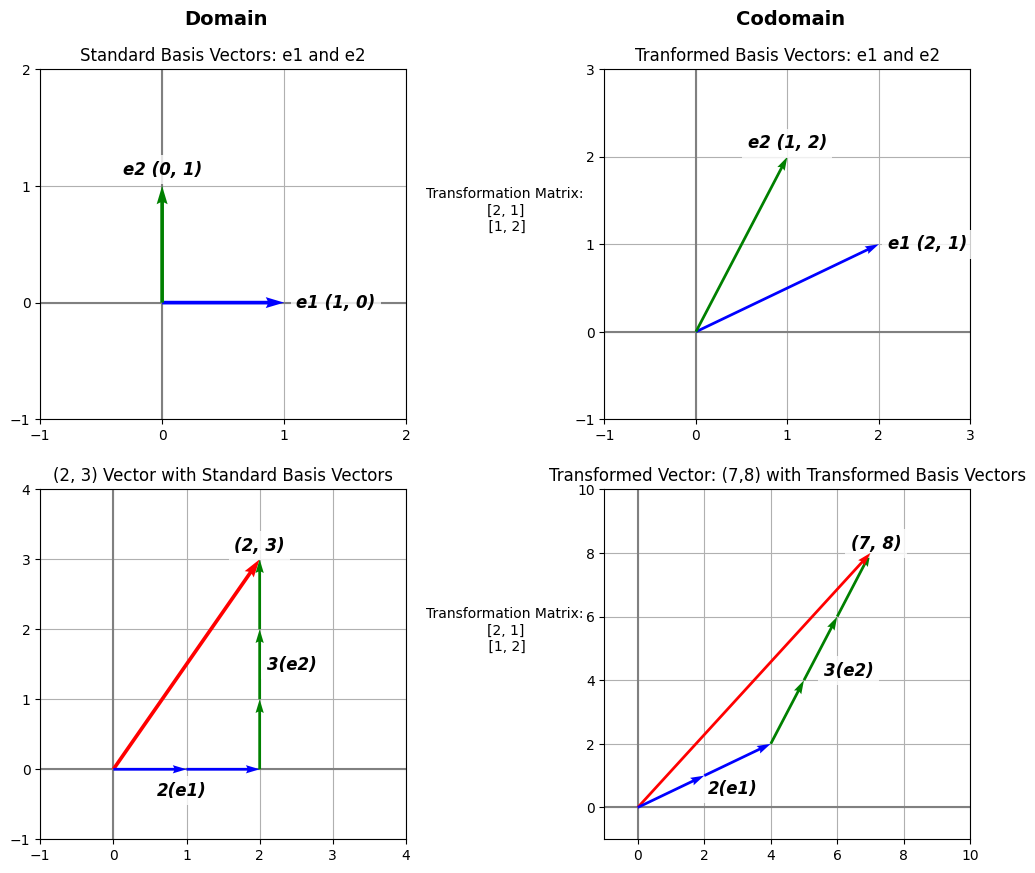

In [ ]:
fig = plt.figure(figsize=(12, 10))


############### TOP LEFT ###############

# Creating standard basis vectors (e1 & e2)
ax1 = fig.add_subplot(2, 15, (1, 6))
ax1.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)
ax1.quiver(0, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)

# Adding enhanced text annotations
ax1.text(1.1, 0, 'e1 (1, 0)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax1.text(0, 1.1, 'e2 (0, 1)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.axhline(0, color='grey', linewidth=1.5)
ax1.axvline(0, color='grey', linewidth=1.5)

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.grid(True)
ax1.set_title('Standard Basis Vectors: e1 and e2')


############### BOTTOM LEFT ###############

# Creating standard vector
ax4 = fig.add_subplot(2, 15, (16, 21))
ax4.quiver(0, 0, *vector, color=['r'], scale=1, scale_units='xy', angles='xy', width=.01, zorder=3)
ax4.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(1, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 1, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 2, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)

ax4.text(.6, -.3, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax4.text(2.1, 1.5, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax4.text(1.65, 3.2, '(2, 3)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax4.set_xlim(-1, 4)
ax4.set_ylim(-1, 4)
ax4.axhline(0, color='grey', linewidth=1.5)
ax4.axvline(0, color='grey', linewidth=1.5)

ax4.grid(True)
ax4.set_title('(2, 3) Vector with Standard Basis Vectors')


############### TOP RIGHT ###############

ax2 = fig.add_subplot(2, 15, (10, 15))
ax2.quiver(0, 0, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(0, 0, *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

# Adding enhanced text annotations
ax2.text(2.1, 1, 'e1 (2, 1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax2.text(1, 2.1, 'e2 (1, 2)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax2.set_xlim(-1, 3)
ax2.set_ylim(-1, 3)
ax2.axhline(0, color='grey', linewidth=1.5)
ax2.axvline(0, color='grey', linewidth=1.5)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))

ax2.grid(True)
ax2.set_title('Tranformed Basis Vectors: e1 and e2')


############### BOTTOM RIGHT ###############

ax5 = fig.add_subplot(2, 15, (25, 30))
ax5.quiver(0, 0, *transformed_vector, color=['r'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(0, 0, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*codomain_basis_vector_x, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x + codomain_basis_vector_y), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x + 2*codomain_basis_vector_y), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

ax5.text(2.1, .6, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax5.text(5.6, 4.3, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax5.text(6.4, 8.3, '(7, 8)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax5.set_xlim(-1, 10)
ax5.set_ylim(-1, 10)
ax5.axhline(0, color='grey', linewidth=1.5)
ax5.axvline(0, color='grey', linewidth=1.5)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))

ax5.grid(True)
ax5.set_title('Transformed Vector: (7,8) with Transformed Basis Vectors')


############### TRANSFORMATION MATRIX TOP ###############

matrix_str = f'Transformation Matrix:\n[2, 1]\n [1, 2]'

ax3 = fig.add_subplot(2,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')

ax3.axis('off')

############### TRANSFORMATION MATRIX BOTTOM ###############
ax6 = fig.add_subplot(2,15, 23)
ax6.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')

ax6.axis('off')

############### DOMAIN AND CODOMAIN LABELS ###############

# Adding domain label
fig.text(0.28, .93, 'Domain', ha='center', va='center', fontsize=14, fontweight='bold')

# Adding codomain label
fig.text(0.75, .93, 'Codomain', ha='center', va='center', fontsize=14, fontweight='bold')

fig.savefig('StandardBasisVectors+LinearTransformation.png')

#Figure 7 (Column Space)

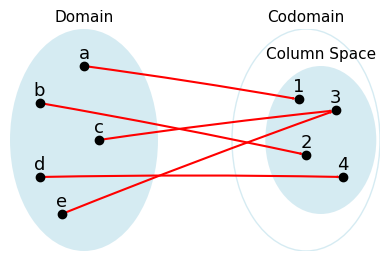

In [46]:
def draw_set(ax, center, width, height, label, points, point_labels, ec, color):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, ec=ec, color=color, fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=11)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=13)

# Initialize plot
fig, ax = plt.subplots(figsize=(4, 3))

# Define properties for domain and codomain
domain_center = [1.5, 0]
codomain_center = [4.5, 0]
set_width, set_height = 2, 3

# Points in the domain and codomain
domain_points = np.array([[0, 1], [-0.6, 0.5], [0.2, 0], [-0.6, -0.5], [-0.3, -1]])
codomain_points = np.array([[-0.1, .55], [0, -0.2], [0.4, 0.4], [0.5, -0.5]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'], ec = None, color = 'lightblue')
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'], ec = 'lightblue', color = 'white')
draw_set(ax, [4.7, 0], 1.5, 2, 'Column Space',[],[], ec = None, color = 'lightblue')

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=-.01", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.tight_layout(h_pad=0.0, w_pad=0.0)
plt.margins(0)
plt.show()

fig.savefig('MappingColumnSpace.png')